# Final Report for Andhra Pradesh dummy model

### Importing the data in our program and applying feature engineering.

In [1]:
import pandas as pd
import warnings 
from sklearn import metrics
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
df  = pd.read_excel('dff.xlsx',index_col='Complete Timestamp')
df['various_day_of_year'] = df.index.dayofyear
df['time_of_day'] = df.index.hour
df['day-of-week'] = df.index.dayofweek
df.head()

,air_temp,rh,press,TOTAL REQUIS,TOTAL REQUIS BASE_ADJUSTED,various_day_of_year,time_of_day,day-of-week
Complete Timestamp,,,,,,,,
2008-01-01 02:30:00,22.444444,78.000000,1012.632578,1722.1,1722.1,1,2,1
2008-01-01 02:45:00,22.317130,78.645833,1012.674244,1722.1,1722.1,1,2,1
2008-01-01 03:00:00,22.189815,79.291667,1012.715911,1722.1,1722.1,1,3,1
2008-01-01 03:15:00,22.062500,79.937500,1012.757578,1722.1,1722.1,1,3,1
2008-01-01 03:30:00,21.935185,80.583333,1012.799244,1722.1,1722.1,1,3,1


# Checking the information of the frame

In [2]:
import pandas_profiling

In [3]:
pandas_profiling.ProfileReport(df)

Number of variables,9
Number of observations,383510
Total Missing (%),0.0%
Total size in memory,26.3 MiB
Average record size in memory,72.0 B
Numeric,8
Categorical,0
Boolean,0
Date,1
Text (Unique),0
Rejected,0


## Visualizing the data(As you can see the load data is adjusted by taking the 2008 as a base year)

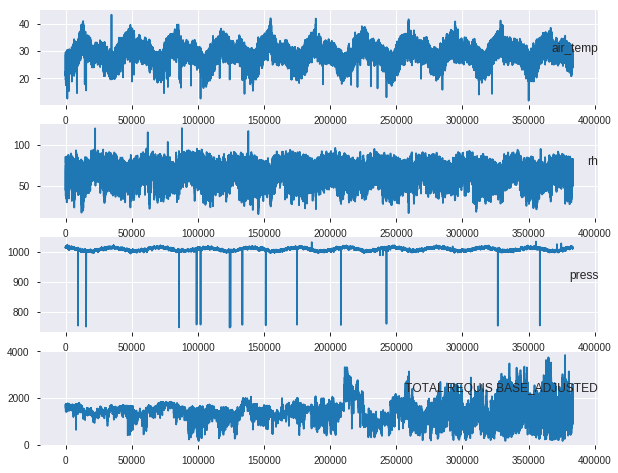

In [4]:
from matplotlib import pyplot
%matplotlib inline
# load dataset
values = df.values
# specify columns to plot
groups = [0, 1, 2, 4]
i = 1
# plot each column
pyplot.figure(figsize=(10,8))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(df.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

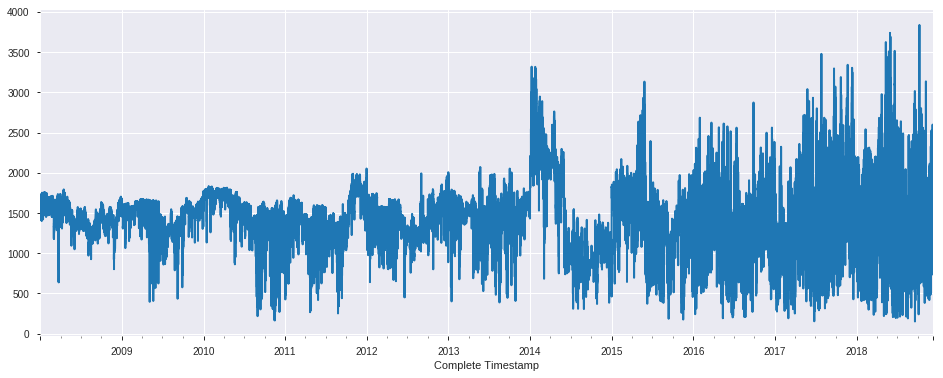

In [5]:
import seaborn as sns
df['TOTAL REQUIS BASE_ADJUSTED'].plot(figsize = (16,6),fontsize = 10.0,linewidth = 2)

In [6]:
from pylab import rcParams
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline
rcParams['figure.figsize'] = 20,6

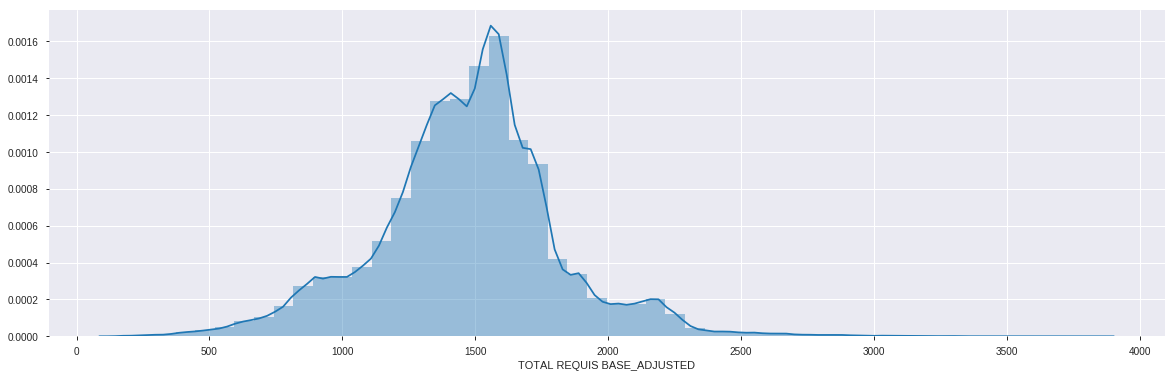

In [8]:
sns.distplot(df['TOTAL REQUIS BASE_ADJUSTED'])

# Visualizing the Outliers

## Visualizing using the boxplots

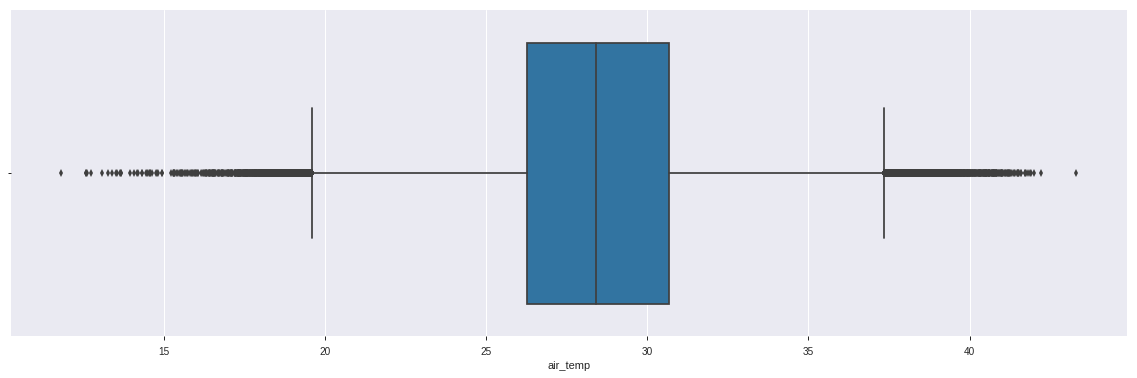

In [9]:
sns.boxplot(df['air_temp'])

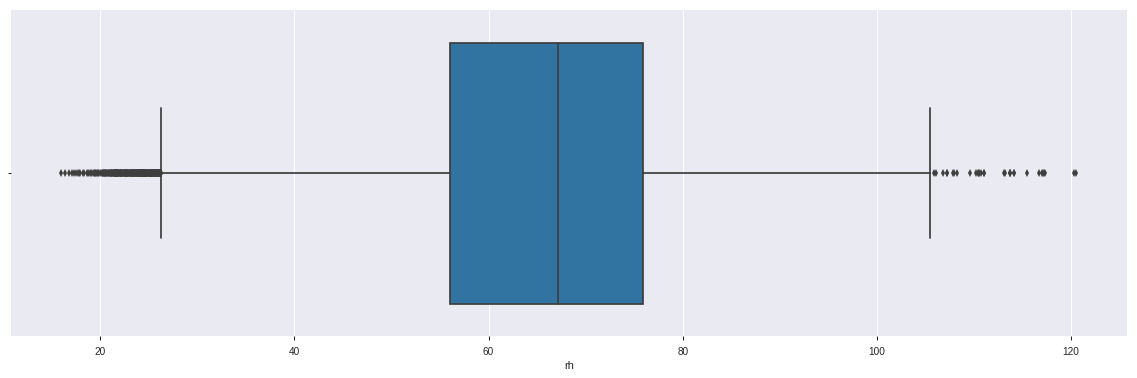

In [10]:
sns.boxplot(df['rh'])

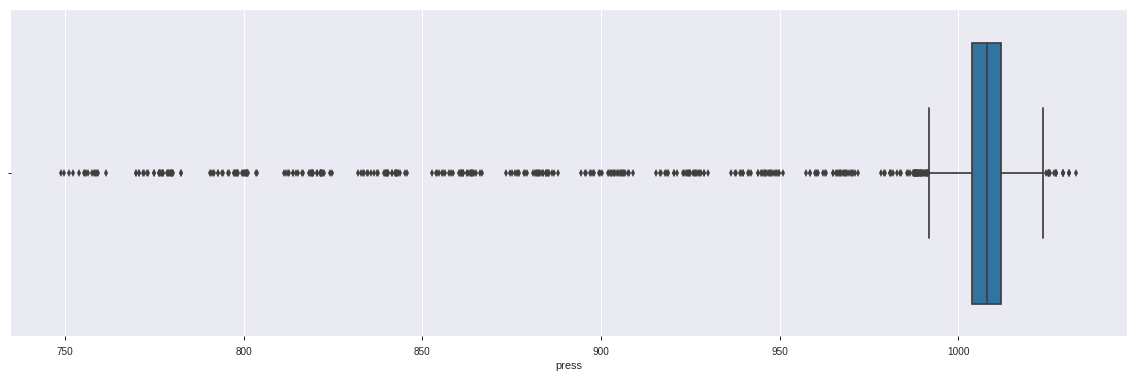

In [11]:
sns.boxplot(df['press'])

# Visualizing using 2D and 3D Plots(Multivariate outlier detection)

## Airtemperature VS Relative Humidity

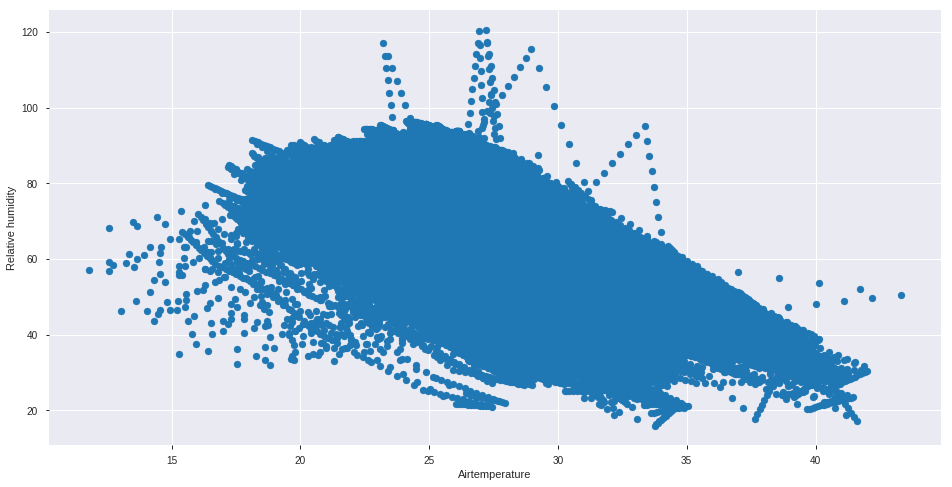

In [12]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['air_temp'],df['rh'])
ax.set_xlabel('Airtemperature')
ax.set_ylabel('Relative humidity')
plt.show()

## Airtemperature VS Pressure

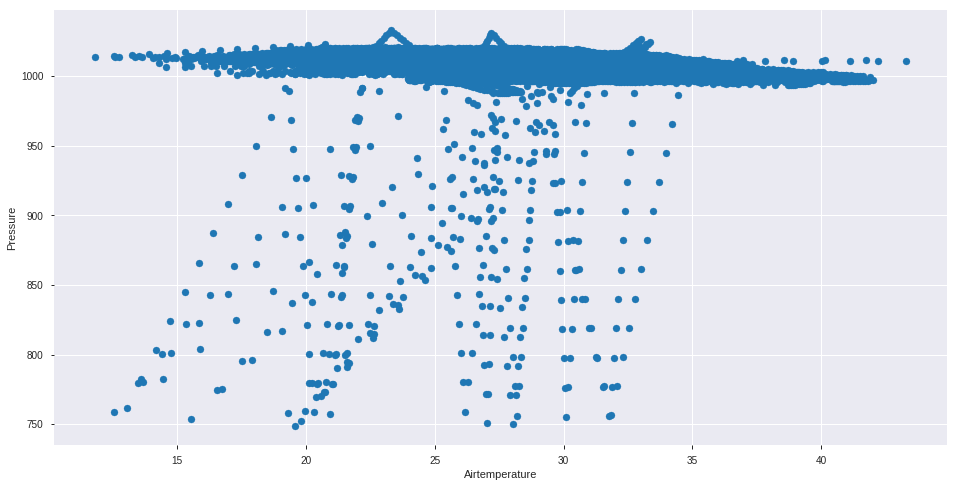

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['air_temp'],df['press'])
ax.set_xlabel('Airtemperature')
ax.set_ylabel('Pressure')
plt.show()

## Relative Humidity VS Pressure

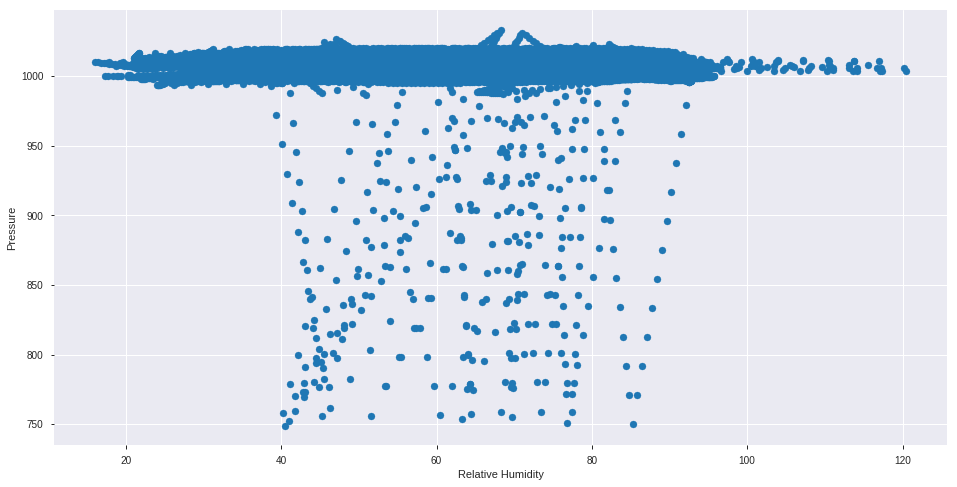

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['rh'],df['press'])
ax.set_xlabel('Relative Humidity')
ax.set_ylabel('Pressure')
plt.show()

# 3D Plot between Airtemperature, Relative Humidity and Pressure

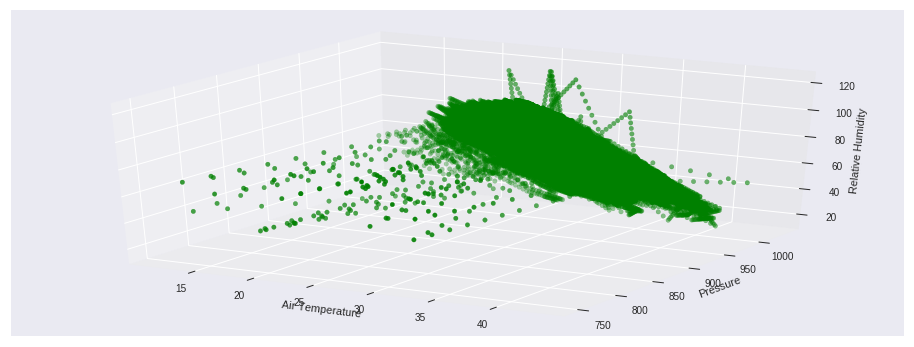

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(111, projection='3d')

x = df['air_temp']
y = df['press']
z = df['rh']



ax.scatter(x, y, z, c='g', marker='o')

ax.set_xlabel('Air Temperature')
ax.set_ylabel('Pressure')
ax.set_zlabel('Relative Humidity')

plt.show()

## Outlier detection using the Z score

### Making a copy of the data for this analysis

In [16]:
data = df.copy(deep=True)
del data['TOTAL REQUIS']
data.head()

,air_temp,rh,press,TOTAL REQUIS BASE_ADJUSTED,various_day_of_year,time_of_day,day-of-week
Complete Timestamp,,,,,,,
2008-01-01 02:30:00,22.444444,78.000000,1012.632578,1722.1,1,2,1
2008-01-01 02:45:00,22.317130,78.645833,1012.674244,1722.1,1,2,1
2008-01-01 03:00:00,22.189815,79.291667,1012.715911,1722.1,1,3,1
2008-01-01 03:15:00,22.062500,79.937500,1012.757578,1722.1,1,3,1
2008-01-01 03:30:00,21.935185,80.583333,1012.799244,1722.1,1,3,1


### Checking the shape of the data before removing the outliers

In [17]:
data.shape

(383510, 7)

### Calculating the Z score 

In [18]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[1.69958909 0.93465709 0.74356392 ... 1.72626318 1.3724641  1.00033913]
 [1.73588457 0.98401153 0.74992319 ... 1.72626318 1.3724641  1.00033913]
 [1.77218005 1.03336598 0.75628246 ... 1.72626318 1.22799844 1.00033913]
 ...
 [0.83377695 0.48250672 0.85485119 ... 1.52314802 1.66131481 1.00028696]
 [0.86017366 0.51434829 0.85803083 ... 1.52314802 1.66131481 1.00028696]
 [0.87799144 0.52230869 0.84531228 ... 1.52314802 1.66131481 1.00028696]]


In [19]:
threshold = 3
print(np.where(z > 3))

(array([   296,    297,    298, ..., 383346, 383347, 383348]), array([0, 0, 0, ..., 3, 3, 3]))


In [20]:
z[296][0]

3.011505659453437

### In the previous section, we saw how we can detect the outlier using Z-score but now we want to remove or filter the outliers and get the clean data.

### data_o contains the data after removing the outliers 

In [21]:
data_o = data[(z < 3).all(axis=1)]

### Checking the shape of the data frame after removing the outliers 

In [22]:
data_o.shape

(378603, 7)

### As we can see data reduced to 378603 instances from 383510 instances

# Visualing the corrected data

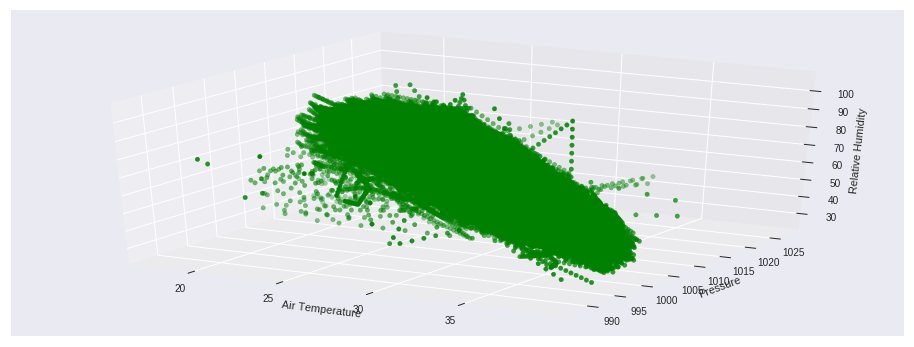

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(111, projection='3d')

x = data_o['air_temp']
y = data_o['press']
z = data_o['rh']



ax.scatter(x, y, z, c='g', marker='o')

ax.set_xlabel('Air Temperature')
ax.set_ylabel('Pressure')
ax.set_zlabel('Relative Humidity')

plt.show()

## As we can see from the graph good amount of outliers has been removed from the data

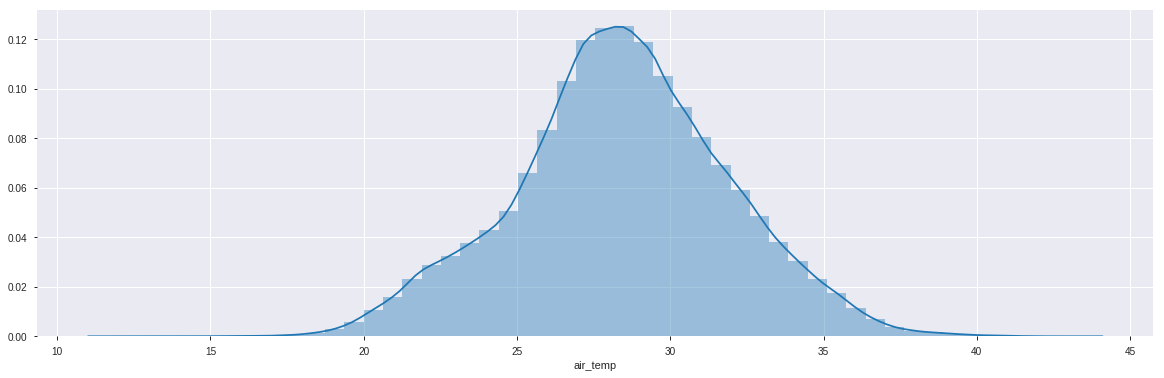

In [24]:
sns.distplot(df['air_temp'])

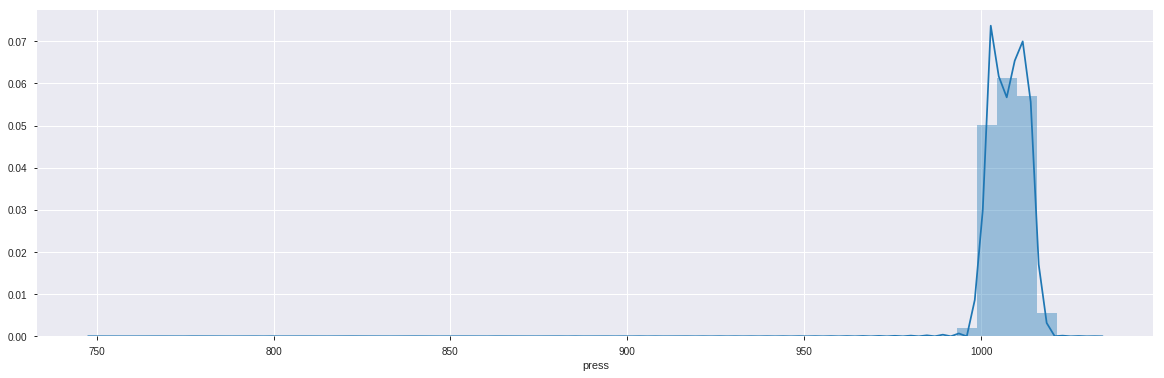

In [25]:
sns.distplot(df['press'])

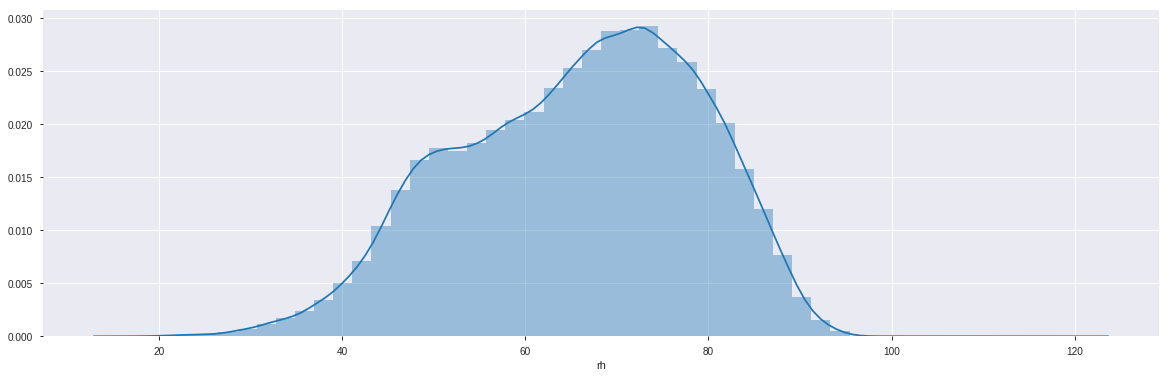

In [26]:
sns.distplot(df['rh'])

# Designing and comparing different regression models on data which is outlier corrected.

In [27]:
data_o.head()

,air_temp,rh,press,TOTAL REQUIS BASE_ADJUSTED,various_day_of_year,time_of_day,day-of-week
Complete Timestamp,,,,,,,
2008-01-01 02:30:00,22.444444,78.000000,1012.632578,1722.1,1,2,1
2008-01-01 02:45:00,22.317130,78.645833,1012.674244,1722.1,1,2,1
2008-01-01 03:00:00,22.189815,79.291667,1012.715911,1722.1,1,3,1
2008-01-01 03:15:00,22.062500,79.937500,1012.757578,1722.1,1,3,1
2008-01-01 03:30:00,21.935185,80.583333,1012.799244,1722.1,1,3,1


### Defining the traing and testing data

In [28]:
X = data_o.iloc[:, [0,1,2,4,5,6]].values
y = data_o.iloc[:, 3].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Multiple Regression models

In [29]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [30]:
# Measure RMSE error.  RMSE is common for regression.
pred = regressor.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 299.81380067800706


In [31]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.figure(figsize=(16,6))
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

In [32]:
print('accuracy or variace between actual and predicted=', metrics.explained_variance_score(y_test, y_pred))

accuracy or variace between actual and predicted= 0.14325992720229364


accuracy or variace between actual and predicted= 0.14325992720229364


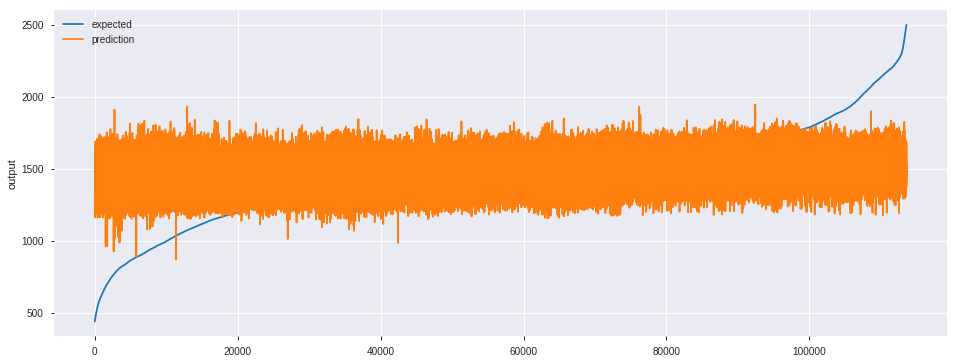

In [33]:
print('accuracy or variace between actual and predicted=', metrics.explained_variance_score(y_test, pred)) 
chart_regression(pred.flatten(),y_test)

## Random Forest tree regression

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators }
random_grid
        

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [38]:
random_grid = {'n_estimators': [10,20,30,40,50,60]}

In [39]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/adi/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_search.py:271: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:  2.3min remaining:   52.9s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 20, 30, 40, 50, 60]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [40]:
# Predicting the Test set results
y_pred_RF = regressor.predict(X_test)

In [41]:
print('accuracy or variace between actual and predicted=', metrics.explained_variance_score(y_test, y_pred_RF))

accuracy or variace between actual and predicted= 0.14325992720229364


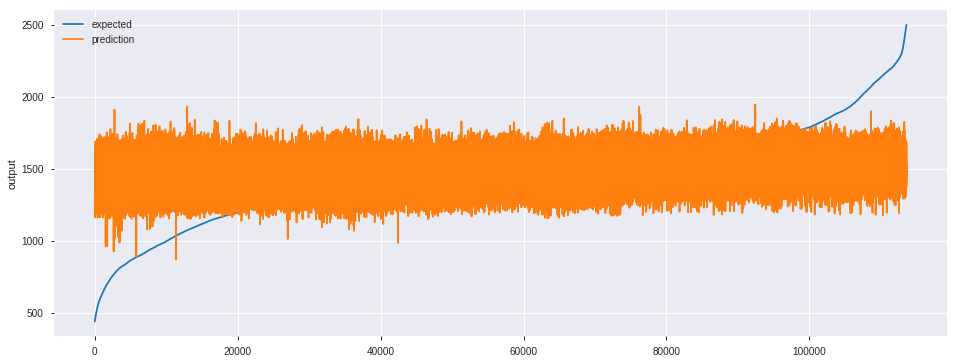

In [42]:
chart_regression(y_pred_RF.flatten(),y_test)

In [43]:
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [44]:
# Predicting the Test set results
y_pred_DT = regressor.predict(X_test)

In [45]:
print('accuracy or variace between actual and predicted=', metrics.explained_variance_score(y_test, y_pred_DT))

accuracy or variace between actual and predicted= 0.14325992720229364


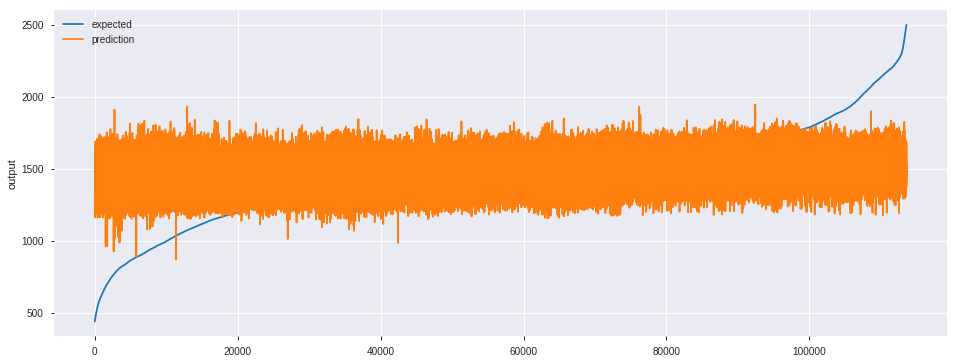

In [46]:
chart_regression(y_pred_DT.flatten(),y_test)

# Creating the feed forward neural network

In [47]:
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

Using TensorFlow backend.


In [48]:
## Feature scaling

# Standardize ranges
data_o['air_temp'] = zscore(data_o['air_temp'])
data_o['rh'] = zscore(data_o['rh'])
data_o['press'] = zscore(data_o['press'])
data_o['various_day_of_year'] = zscore(data_o['various_day_of_year'])
data_o['time_of_day'] = zscore(data_o['time_of_day'])
data_o['day-of-week'] = zscore(data_o['day-of-week'])
#data_o['TOTAL REQUIS BASE_ADJUSTED'] = zscore(data_o['TOTAL REQUIS BASE_ADJUSTED'])

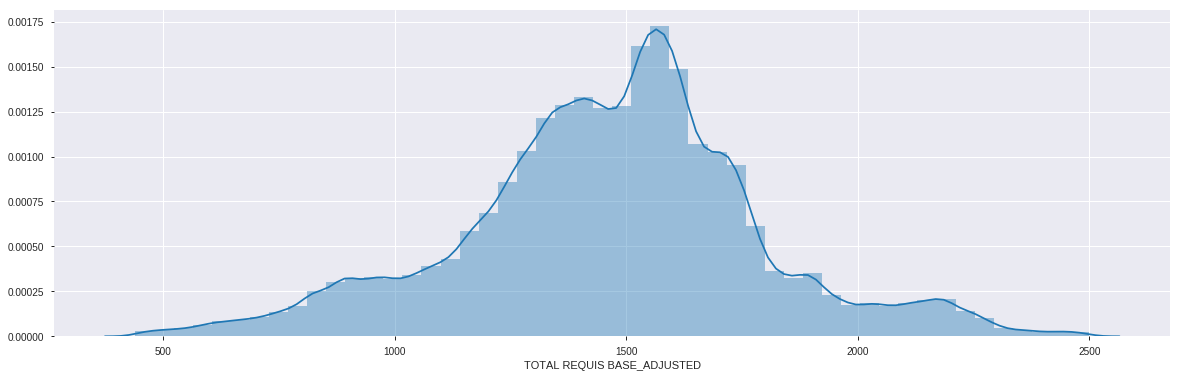

In [60]:
sns.distplot(data_o['TOTAL REQUIS BASE_ADJUSTED'])

In [49]:
data_o.head()

,air_temp,rh,press,TOTAL REQUIS BASE_ADJUSTED,various_day_of_year,time_of_day,day-of-week
Complete Timestamp,,,,,,,
2008-01-01 02:30:00,-1.722024,0.938566,1.009727,1722.1,-1.730676,-1.373269,-1.000886
2008-01-01 02:45:00,-1.758819,0.988324,1.018590,1722.1,-1.730676,-1.373269,-1.000886
2008-01-01 03:00:00,-1.795613,1.038083,1.027454,1722.1,-1.730676,-1.228751,-1.000886
2008-01-01 03:15:00,-1.832408,1.087841,1.036318,1722.1,-1.730676,-1.228751,-1.000886
2008-01-01 03:30:00,-1.869203,1.137600,1.045181,1722.1,-1.730676,-1.228751,-1.000886


In [50]:
xx = data_o.iloc[:, [0,1,2,4,5,6]].values
yy = data_o.iloc[:, 3].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size = 0.3, random_state = 0)

In [51]:
regressor = Sequential()
regressor.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu',input_dim=6))
regressor.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units = 256, kernel_initializer = 'uniform', activation = 'relu'))
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

In [52]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [53]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

In [54]:
regressor.fit(X_train,y_train,validation_data=(X_test,y_test),callbacks=[monitor],verbose=2,epochs=1000)

Train on 265022 samples, validate on 113581 samples
Epoch 1/1000
 - 27s - loss: 100596.3659 - acc: 1.5093e-05 - val_loss: 86605.2097 - val_acc: 1.7609e-05
Epoch 2/1000
 - 23s - loss: 87007.3599 - acc: 3.0186e-05 - val_loss: 83885.6947 - val_acc: 8.8043e-06
Epoch 3/1000
 - 25s - loss: 85100.4752 - acc: 3.3959e-05 - val_loss: 81346.7880 - val_acc: 5.2826e-05
Epoch 4/1000
 - 26s - loss: 83729.3905 - acc: 3.3959e-05 - val_loss: 86226.4907 - val_acc: 2.6413e-05
Epoch 5/1000
 - 25s - loss: 82831.6919 - acc: 2.6413e-05 - val_loss: 80402.7593 - val_acc: 8.8043e-06
Epoch 6/1000
 - 25s - loss: 82131.7779 - acc: 3.7733e-05 - val_loss: 81254.6983 - val_acc: 4.4021e-05
Epoch 7/1000
 - 23s - loss: 81442.2157 - acc: 2.6413e-05 - val_loss: 82177.6951 - val_acc: 8.8043e-06
Epoch 8/1000
 - 23s - loss: 80694.0940 - acc: 2.6413e-05 - val_loss: 78480.8429 - val_acc: 2.6413e-05
Epoch 9/1000
 - 23s - loss: 80040.0734 - acc: 2.6413e-05 - val_loss: 77495.9810 - val_acc: 7.9239e-05
Epoch 10/1000
 - 23s - loss: 

 - 23s - loss: 44761.6355 - acc: 3.7733e-05 - val_loss: 48196.0593 - val_acc: 3.5217e-05
Epoch 81/1000
 - 24s - loss: 44544.2732 - acc: 3.0186e-05 - val_loss: 48285.8979 - val_acc: 5.2826e-05
Epoch 82/1000
 - 25s - loss: 44290.4127 - acc: 4.1506e-05 - val_loss: 47752.2228 - val_acc: 2.6413e-05
Epoch 83/1000
 - 24s - loss: 43965.5670 - acc: 2.2640e-05 - val_loss: 47956.0926 - val_acc: 6.1630e-05
Epoch 84/1000
 - 27s - loss: 43780.8987 - acc: 3.3959e-05 - val_loss: 47582.6590 - val_acc: 2.6413e-05
Epoch 85/1000
 - 24s - loss: 43429.5809 - acc: 3.0186e-05 - val_loss: 47777.5384 - val_acc: 3.5217e-05
Epoch 86/1000
 - 26s - loss: 43291.8541 - acc: 2.2640e-05 - val_loss: 46897.5953 - val_acc: 1.7609e-05
Epoch 87/1000
 - 28s - loss: 43040.6090 - acc: 4.1506e-05 - val_loss: 49209.9973 - val_acc: 4.4021e-05
Epoch 88/1000
 - 26s - loss: 42728.3357 - acc: 4.9053e-05 - val_loss: 46825.4734 - val_acc: 3.5217e-05
Epoch 89/1000
 - 24s - loss: 42467.0520 - acc: 4.1506e-05 - val_loss: 46858.1566 - val_

In [55]:
# Measure RMSE error.  RMSE is common for regression.
from sklearn import metrics
pred = regressor.predict(X_test)
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print(f"Final score (RMSE): {score}")

Final score (RMSE): 204.43748232506636


In [56]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.figure(figsize=(16,6))
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

accuracy or variace between actual and predicted= 0.6017196328164994


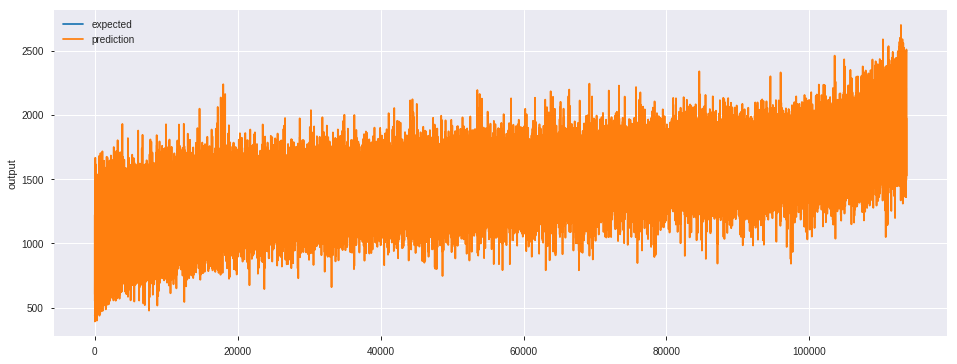

In [57]:
from sklearn import metrics
print('accuracy or variace between actual and predicted=', metrics.explained_variance_score(y_test, pred)) 
chart_regression(pred.flatten(),y_test)

#  Lets try Time Series Prediction algorithms

In [ ]:
# convert series to supervised learning
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset =  pd.read_excel('dff.xlsx',index_col='Complete Timestamp')
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())